<a href="https://colab.research.google.com/github/olesya-eremina/introDSML/blob/main/StepikMLcontest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Анализ активности студентов онлайн курса "Введение в анализ данных в R"

# Описание данных


**events_train.csv** - данные о действиях, которые совершают студенты со стэпами

1.   **step_id** - id стэпа
2.   **user_id** - анонимизированный id юзера
3.  **timestamp** - время наступления события в формате unix date
4.   **action** - событие, возможные значения:

  *   *discovered* - пользователь перешел на стэп
  *   *viewed* - просмотр шага,
  *   *started_attempt* - начало попытки решить шаг, ранее нужно было явно нажать на кнопку - начать решение, перед тем как приступить к решению практического шага
  *   *passed* - удачное решение практического шага

**submissions_train.csv** - данные о времени и статусах сабмитов к практическим заданиям

1.   **step_id** - id стэпа
2.   **timestamp** - время отправки решения в формате unix date
3.   **submission_status** - статус решения
4.   **user_id** - анонимизированный id юзера

# Загрузка и просмотр данных

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
events_data = pd.read_csv('event_data_train.zip', compression='zip')

In [10]:
events_data.head()

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


In [11]:
events_data.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [12]:
events_data['date'] = pd.to_datetime(events_data.timestamp, unit='s')

In [14]:
events_data.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [16]:
events_data.dtypes

step_id               int64
timestamp             int64
action               object
user_id               int64
date         datetime64[ns]
dtype: object

In [17]:
events_data.date.min()

Timestamp('2015-06-15 04:00:48')

In [18]:
events_data.date.max()

Timestamp('2018-05-19 23:33:31')

In [19]:
events_data['day'] = events_data.date.dt.date

In [21]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


<Axes: xlabel='day'>

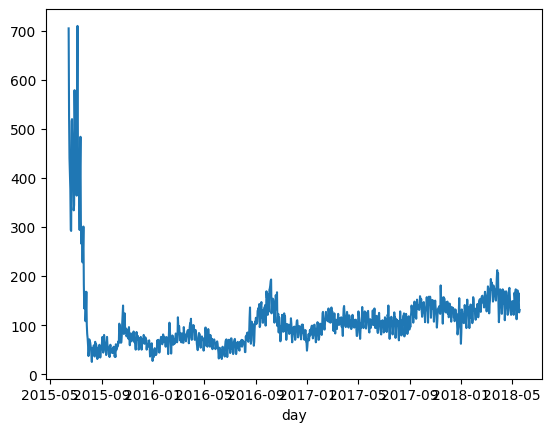

In [24]:
events_data.groupby('day').user_id.nunique().plot()